In [143]:
import numpy as np
import matplotlib.pyplot as plt

In [144]:
def step_upwind(N, dt, dx, v, U):
    W = []
    for j in range(N):
        frac = v(j * dx) * dt / dx
        if frac < 0:
            k = j + 1
            frac = -frac
        else:
            k = (j - 1) % N
        W.append(U[j] + frac*(U[k]-U[j]))
    W.append(W[0])
    return W

In [145]:
def v_0(x):
    return 1

def v_1(x):
    return -1

def v_5(x):
    if x <= 1/4:
        return 1
    elif x <= 1/2:
        return 1 - 2 * (x - 1/4)
    elif x <= 3/4:
        return 1/2
    else:
        return 1/2 + 2 * (x - 3/4)

In [146]:
def g(x):
    if x <= 0.05:
        return 20 * x
    elif x <= 0.1:
        return 2 - (20 * x)
    else:
        return 0

# Case 0

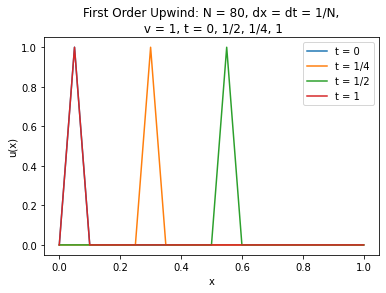

In [147]:
N = 80
dt = 1/N
dx = 1/N

U = [[]]

for i in range(N):
    U[0].append(g(i/N))
U[0].append(U[0][0])

for i in range(1, N+1):
    U.append(step_upwind(N, dt, dx, v_0, U[i-1]))

xVar = np.arange(0, 1+1/N, 1/N)
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('u(x)')
ax.set_title('First Order Upwind: N = 80, dx = dt = 1/N,\n v = 1, t = 0, 1/2, 1/4, 1')
ax.plot(xVar, U[0], label='t = 0')
ax.plot(xVar, U[20], label='t = 1/4')
ax.plot(xVar, U[40], label='t = 1/2')
ax.plot(xVar, U[80], label='t = 1')
ax.legend()

# Case 1

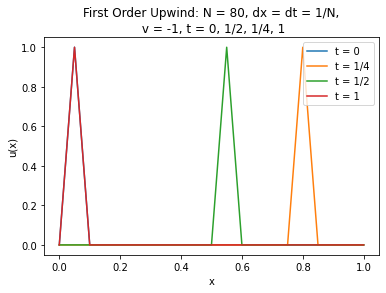

In [148]:
N = 80
dt = 1/N
dx = 1/N

U = [[]]

for i in range(N):
    U[0].append(g(i/N))
U[0].append(U[0][0])

for i in range(1, N+1):
    U.append(step_upwind(N, dt, dx, v_1, U[i-1]))

xVar = np.arange(0, 1+1/N, 1/N)
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('u(x)')
ax.set_title('First Order Upwind: N = 80, dx = dt = 1/N,\n v = -1, t = 0, 1/2, 1/4, 1')
ax.plot(xVar, U[0], label='t = 0')
ax.plot(xVar, U[20], label='t = 1/4')
ax.plot(xVar, U[40], label='t = 1/2')
ax.plot(xVar, U[80], label='t = 1')
ax.legend()

# Case 2

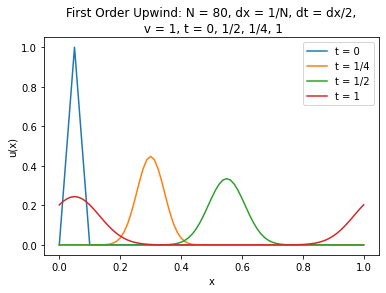

In [149]:
N = 80
dx = 1/N
dt = dx/2

U = [[]]

for i in range(N):
    U[0].append(g(i/N))
U[0].append(U[0][0])

for i in range(1, (2*N)+1):
    U.append(step_upwind(N, dt, dx, v_0, U[i-1]))

xVar = np.arange(0, 1+1/N, 1/N)
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('u(x)')
ax.set_title('First Order Upwind: N = 80, dx = 1/N, dt = dx/2,\n v = 1, t = 0, 1/2, 1/4, 1')
ax.plot(xVar, U[0], label='t = 0')
ax.plot(xVar, U[40], label='t = 1/4')
ax.plot(xVar, U[80], label='t = 1/2')
ax.plot(xVar, U[160], label='t = 1')
ax.legend()

# Case 3

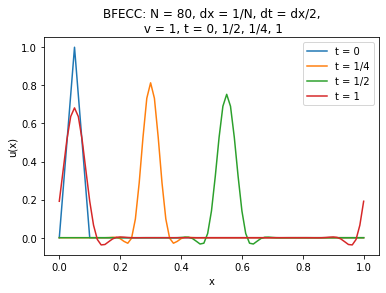

In [150]:
N = 80
dx = 1/N
dt = dx/2

U = [[]]

for i in range(N):
    U[0].append(g(i/N))
U[0].append(U[0][0])

G = []
B = []
C = []

for i in range(1, (2*N)+1):
    G.append(step_upwind(N, dt, dx, v_0, U[i-1]))
    B.append(step_upwind(N, -dt, dx, v_0, G[i-1]))
    C.append(list(np.array(U[i-1]) + (1/2)*(np.array(U[i-1]) - np.array(B[i-1]))))
    U.append(step_upwind(N, dt, dx, v_0, C[i-1]))

xVar = np.arange(0, 1+1/N, 1/N)
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('u(x)')
ax.set_title('BFECC: N = 80, dx = 1/N, dt = dx/2,\n v = 1, t = 0, 1/2, 1/4, 1')
ax.plot(xVar, U[0], label='t = 0')
ax.plot(xVar, U[40], label='t = 1/4')
ax.plot(xVar, U[80], label='t = 1/2')
ax.plot(xVar, U[160], label='t = 1')
ax.legend()

# Case 4

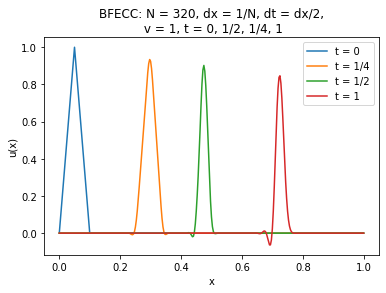

In [151]:
N = 320
dx = 1/N
dt = dx/2

U = [[]]

for i in range(N):
    U[0].append(g(i/N))
U[0].append(U[0][0])

G = []
B = []
C = []

for i in range(1, (2*N)+1):
    G.append(step_upwind(N, dt, dx, v_5, U[i-1]))
    B.append(step_upwind(N, -dt, dx, v_5, G[i-1]))
    C.append(list(np.array(U[i-1]) + (1/2)*(np.array(U[i-1]) - np.array(B[i-1]))))
    U.append(step_upwind(N, dt, dx, v_5, C[i-1]))

xVar = np.arange(0, 1+1/N, 1/N)
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('u(x)')
ax.set_title('BFECC: N = 320, dx = 1/N, dt = dx/2,\n v = 1, t = 0, 1/2, 1/4, 1')
ax.plot(xVar, U[0], label='t = 0')
ax.plot(xVar, U[160], label='t = 1/4')
ax.plot(xVar, U[320], label='t = 1/2')
ax.plot(xVar, U[640], label='t = 1')
ax.legend()

# Case 5

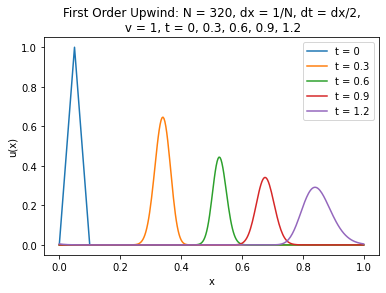

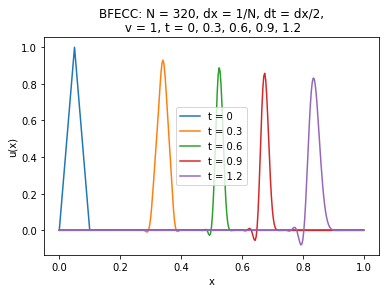

In [152]:
# First Order Upwind
# 3/4 + ln(2) = 1.443...
N = 320
dx = 1/N
dt = dx/2
ramped_velocity = 3/4 + np.log(2)

U = [[]]

for i in range(N):
    U[0].append(g(i/N))
U[0].append(U[0][0])

for i in range(1, int(ramped_velocity * 640)):
    U.append(step_upwind(N, dt, dx, v_5, U[i-1]))

xVar = np.arange(0, 1+1/N, 1/N)
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('u(x)')
ax.set_title('First Order Upwind: N = 320, dx = 1/N, dt = dx/2,\n v = 1, t = 0, 0.3, 0.6, 0.9, 1.2')
ax.plot(xVar, U[0], label='t = 0')
ax.plot(xVar, U[int(640 * 0.3)], label='t = 0.3')
ax.plot(xVar, U[int(640 * 0.6)], label='t = 0.6')
ax.plot(xVar, U[int(640 * 0.9)], label='t = 0.9')
ax.plot(xVar, U[int(640 * 1.2)], label='t = 1.2')
ax.legend()


####################################################################################################
# BFECC

U = [[]]

for i in range(N):
    U[0].append(g(i/N))
U[0].append(U[0][0])

G = []
B = []
C = []

for i in range(1, int(ramped_velocity * 640)):
    G.append(step_upwind(N, dt, dx, v_5, U[i-1]))
    B.append(step_upwind(N, -dt, dx, v_5, G[i-1]))
    C.append(list(np.array(U[i-1]) + (1/2)*(np.array(U[i-1]) - np.array(B[i-1]))))
    U.append(step_upwind(N, dt, dx, v_5, C[i-1]))

xVar = np.arange(0, 1+1/N, 1/N)
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('u(x)')
ax.set_title('BFECC: N = 320, dx = 1/N, dt = dx/2,\n v = 1, t = 0, 0.3, 0.6, 0.9, 1.2')
ax.plot(xVar, U[0], label='t = 0')
ax.plot(xVar, U[int(640 * 0.3)], label='t = 0.3')
ax.plot(xVar, U[int(640 * 0.6)], label='t = 0.6')
ax.plot(xVar, U[int(640 * 0.9)], label='t = 0.9')
ax.plot(xVar, U[int(640 * 1.2)], label='t = 1.2')
ax.legend()